In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts config of created plots

In [4]:
df = pd.read_csv('movies.csv')

In [5]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
# Check for missing data
# Check for missing data using for loop

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [11]:
#Drop rows with Null values

df.dropna(axis = 0, inplace = True) 

In [13]:
# Check that all Null values have been removed

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [15]:
# Data Types for columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [17]:
# Change data types of colums

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


<Axes: >

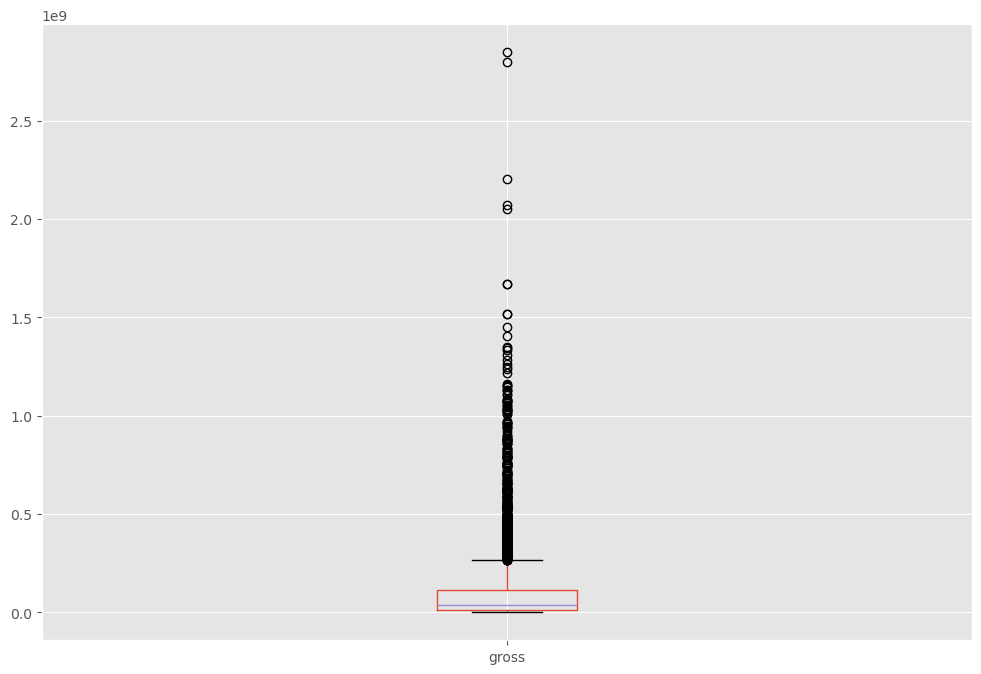

In [19]:
# Check for Outliers

df.boxplot(column=['gross'])

In [21]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [23]:
# Order Data with gross colum

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


<function matplotlib.pyplot.show(close=None, block=None)>

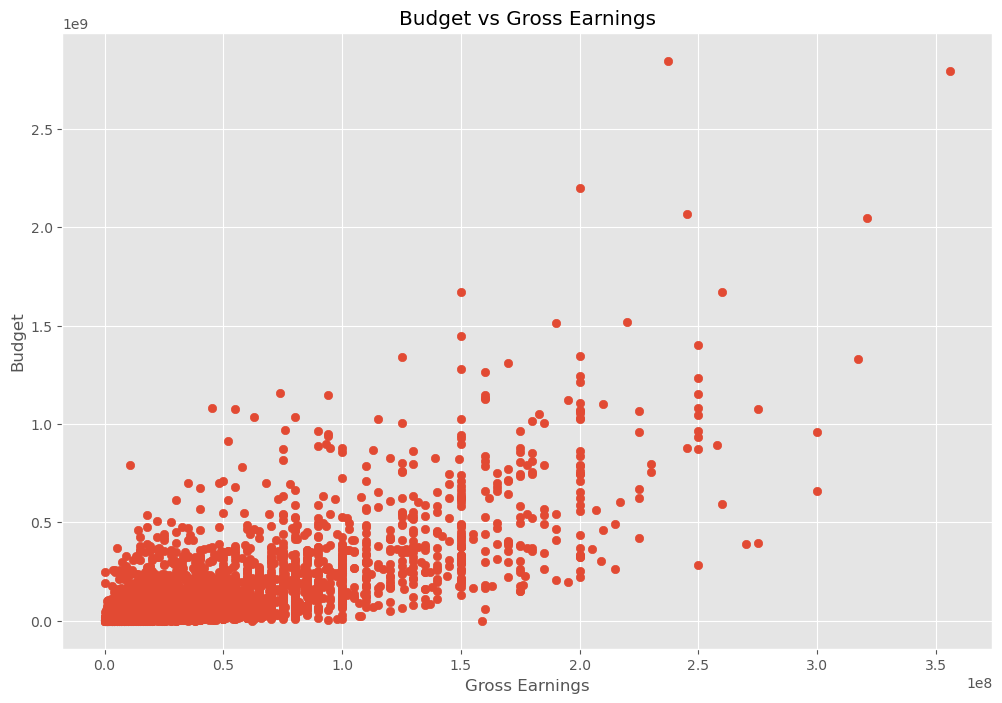

In [25]:
# Scatterplot to see the correlation btw bdget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


<Axes: xlabel='budget', ylabel='gross'>

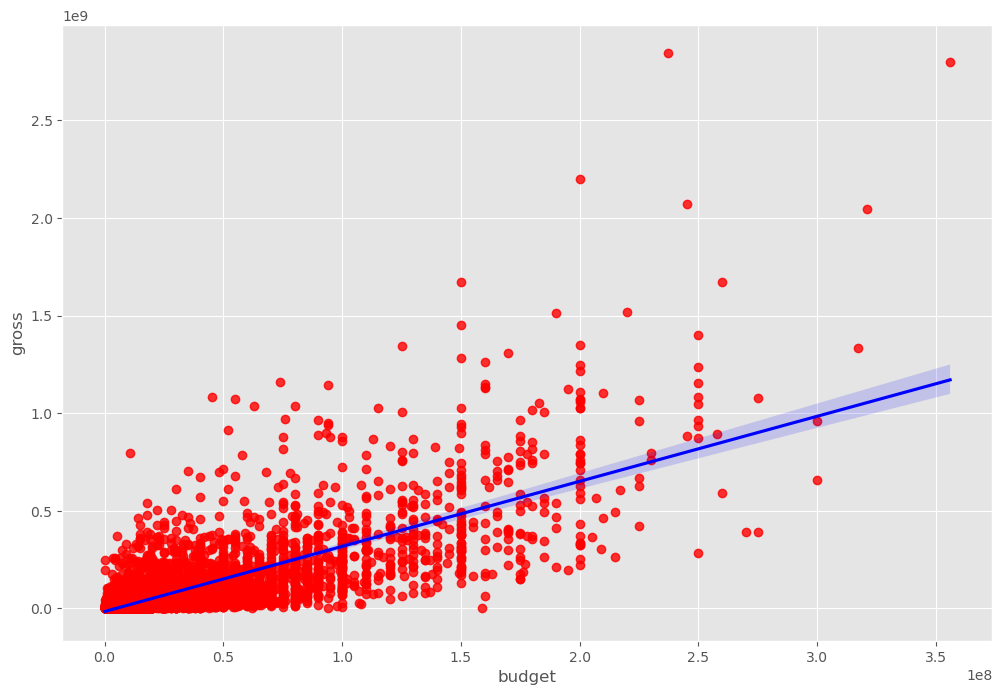

In [29]:
# budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

#This shows positive correlation btw budget and gross earningd for films

<Axes: xlabel='score', ylabel='gross'>

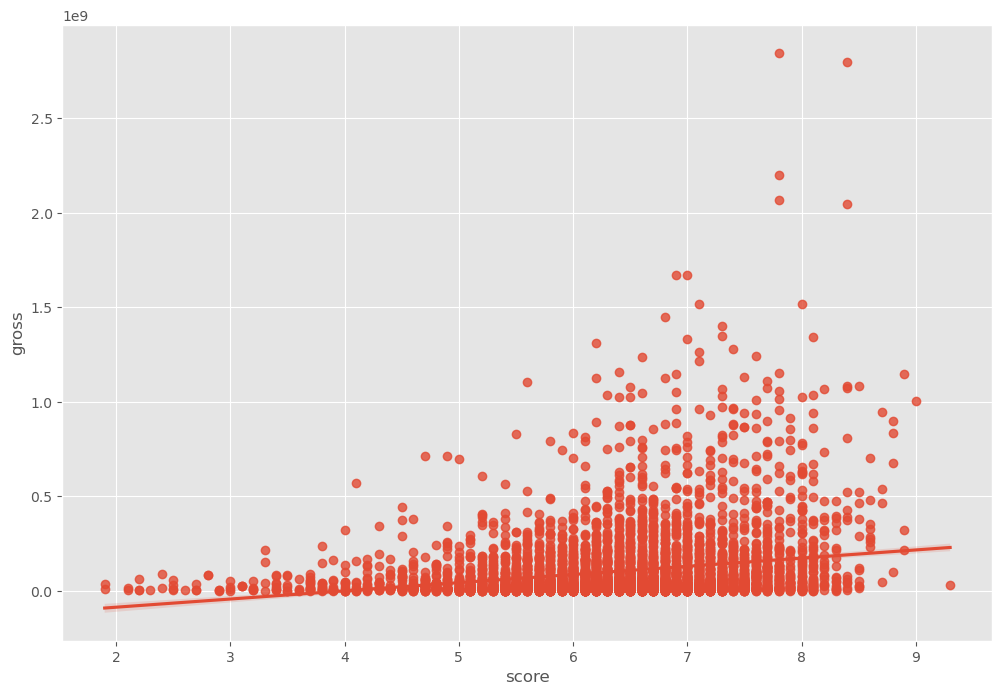

In [31]:
# score vs gross using seaborn

sns.regplot(x="score", y="gross", data=df)

In [45]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652


In [47]:
df.apply(lambda x: x.factorize()[0]).corr(method='kendall')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.238061,0.141553,0.178136,0.528074,0.086600,0.451475,0.520259,0.638768,0.429722,0.091056,0.391251,0.982327,0.437802,0.055021
rating,0.238061,1.000000,0.023144,0.077631,0.179961,-0.049292,0.092699,0.168947,0.185768,0.159027,0.081229,0.208711,0.242037,0.200068,0.016176
genre,0.141553,0.023144,1.000000,0.054465,0.083273,0.013896,0.130176,0.115676,0.113192,0.116565,-0.056183,0.159027,0.139668,0.077143,0.009188
year,0.178136,0.077631,0.054465,1.000000,0.252240,0.030512,0.203595,0.126686,0.156825,0.160427,-0.038146,0.145167,0.184814,0.066716,0.024737
released,0.528074,0.179961,0.083273,0.252240,1.000000,0.068759,0.346408,0.348505,0.406178,0.310653,0.060296,0.288644,0.537466,0.259430,0.036732
score,0.086600,-0.049292,0.013896,0.030512,0.068759,1.000000,0.168908,0.126076,0.082180,0.099108,-0.061907,-0.005805,0.088475,0.005590,0.034738
votes,0.451475,0.092699,0.130176,0.203595,0.346408,0.168908,1.000000,0.348626,0.385804,0.317411,0.001900,0.242127,0.461291,0.237311,0.047993
director,0.520259,0.168947,0.115676,0.126686,0.348505,0.126076,0.348626,1.000000,0.483278,0.345979,0.079497,0.326164,0.529958,0.332548,0.060429
writer,0.638768,0.185768,0.113192,0.156825,0.406178,0.082180,0.385804,0.483278,1.000000,0.353410,0.089004,0.334113,0.649425,0.344629,0.044382
star,0.429722,0.159027,0.116565,0.160427,0.310653,0.099108,0.317411,0.345979,0.353410,1.000000,0.052151,0.319174,0.438870,0.259704,0.068261


In [49]:
df.apply(lambda x: x.factorize()[0]).corr(method='spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.308858,0.197615,0.260806,0.657387,0.126667,0.622068,0.664718,0.751247,0.562547,0.116083,0.551140,0.986389,0.588875,0.081628
rating,0.308858,1.000000,0.025533,0.099790,0.232866,-0.063291,0.120810,0.218382,0.240404,0.204967,0.089528,0.266977,0.313807,0.258638,0.020729
genre,0.197615,0.025533,1.000000,0.074312,0.116197,0.020051,0.180190,0.161620,0.157939,0.161574,-0.065476,0.218492,0.195051,0.105753,0.012318
year,0.260806,0.099790,0.074312,1.000000,0.362312,0.044721,0.296949,0.186383,0.230101,0.235407,-0.048092,0.211046,0.270478,0.099095,0.036222
released,0.657387,0.232866,0.116197,0.362312,1.000000,0.101537,0.488549,0.479935,0.537702,0.430420,0.076857,0.411359,0.666938,0.368870,0.054845
score,0.126667,-0.063291,0.020051,0.044721,0.101537,1.000000,0.248279,0.184100,0.120369,0.144478,-0.077631,-0.008691,0.129527,0.008402,0.050646
votes,0.622068,0.120810,0.180190,0.296949,0.488549,0.248279,1.000000,0.494245,0.541468,0.453184,0.002407,0.351538,0.634886,0.343433,0.071056
director,0.664718,0.218382,0.161620,0.186383,0.479935,0.184100,0.494245,1.000000,0.626607,0.475371,0.101263,0.464004,0.675922,0.465255,0.089783
writer,0.751247,0.240404,0.157939,0.230101,0.537702,0.120369,0.541468,0.626607,1.000000,0.479669,0.113447,0.475614,0.762561,0.477556,0.065746
star,0.562547,0.204967,0.161574,0.235407,0.430420,0.144478,0.453184,0.475371,0.479669,1.000000,0.066483,0.453041,0.573538,0.368491,0.100856


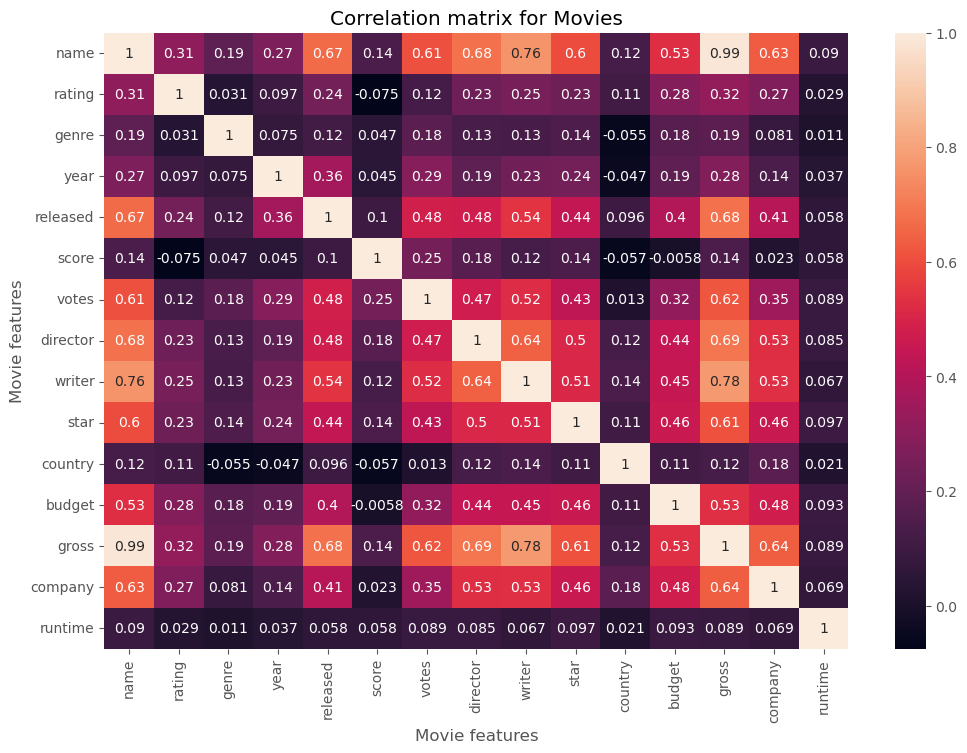

In [51]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [55]:
# looking at different correlation pairs

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.314800
         genre       0.186668
         year        0.267282
         released    0.667785
                       ...   
runtime  country     0.020546
         budget      0.092727
         gross       0.088572
         company     0.069329
         runtime     1.000000
Length: 225, dtype: float64


In [57]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   score     -0.075109
score    rating    -0.075109
         country   -0.057087
country  score     -0.057087
         genre     -0.055109
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [59]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  star        0.504992
star      director    0.504992
writer    star        0.510628
star      writer      0.510628
votes     writer      0.522918
writer    votes       0.522918
budget    name        0.526690
name      budget      0.526690
director  company     0.528071
company   director    0.528071
writer    company     0.532013
company   writer      0.532013
budget    gross       0.532810
gross     budget      0.532810
released  writer      0.541155
writer    released    0.541155
star      name        0.599410
name      star        0.599410
votes     name        0.608411
name      votes       0.608411
gross     star        0.612142
star      gross       0.612142
gross     votes       0.620450
votes     gross       0.620450
company   name        0.631721
name      company     0.631721
gross     company     0.637241
company   gross       0.637241
director  writer      0.642875
writer    director    0.642875
released  name        0.667785
name      released    0.667785
released

In [61]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64